In [1]:
import numpy as np

test_data=np.load('test_data.npy')
test_target=np.load('test_target.npy')

In [2]:
import joblib

data_scaler=joblib.load('data_scaler.sav')
target_scaler=joblib.load('target_scaler.sav')

In [4]:
from keras.models import load_model

model=load_model('models/model-001.model')

In [5]:
predicted_target=model.predict(test_data)

In [6]:
print(test_data.shape)
print(test_target.shape)
print(predicted_target.shape)

(1200, 1000, 1)
(1200, 1000, 1)
(1200, 1000, 1)


In [7]:
test_data=test_data.reshape(test_data.shape[0],test_data.shape[1])
test_target=test_target.reshape(test_target.shape[0],test_target.shape[1])
predicted_target=predicted_target.reshape(predicted_target.shape[0],predicted_target.shape[1])

scaled_test_data=data_scaler.inverse_transform(test_data)
scaled_test_target=target_scaler.inverse_transform(test_target)
predicted_target=target_scaler.inverse_transform(predicted_target)

KeyboardInterrupt: 

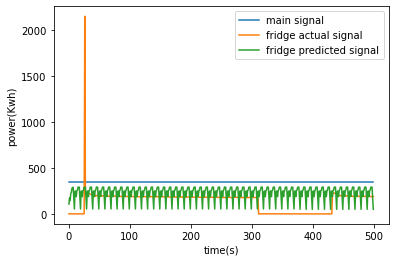

In [9]:
from matplotlib import pyplot as plt

for i in range(len(test_target)):
    
    plt.plot(scaled_test_data[i][:500],label='main signal')
    plt.plot(scaled_test_target[i][:500],label='fridge actual signal')
    plt.plot(predicted_target[i][:500],label='fridge predicted signal')
    plt.legend()
    plt.xlabel('time(s)')
    plt.ylabel('power(Kwh)')
    plt.savefig('results/window-'+str(i)+'.png')
    plt.close()